<a href="https://colab.research.google.com/github/Raagulbharatwaj/BERT/blob/main/Extracting_Embeddings_from_Variants_of_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring BERT Variants**

In this notebook, we will explore several interesting variants of BERT. 
We will learn about popular variants of BERT such as ALBERT, RoBERTa, ELECTRA, and SpanBERT.

We will extract Embeddings from RoBERTa and ALBERT and compare them with BERT-base 

## **Installing 🤗 and making our code Modular**

In [1]:
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from numpy.linalg import norm

### **function to compute cosine similarity of vectors**

In [4]:
def cosine_similarity(v1,v2):
  dot = np.dot(v1,v2)
  print(dot)
  norm_v1 = norm(v1)
  norm_v2 = norm(v2)
  cosine_similarity = dot/(norm_v1*norm_v2)
  return cosine_similarity
  

### **Function to genrate input embeddings**

In [5]:
def get_input_embeddings(tokenizer,seq1,seq2):
  r1 = tokenizer(seq1,return_tensors="pt")
  r2 = tokenizer(seq2,return_tensors="pt")
  return (r1,r2)

### **Function to get reperesentations from the model**

In [6]:
def get_contextual_embeddings(model,r1,r2):
  out1 = model(**r1)
  out2 = model(**r2)
  v1 = out1.last_hidden_state
  v2 = out2.last_hidden_state
  return (v1,v2)

### **Instantiating BERT-base**

In [7]:
from transformers import BertModel,BertTokenizer
import torch

In [8]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


# **ALBERT**

ALBERT is basically A Lite version of BERT model. 

The ALBERT model includes few
architectural changes to the BERT to minimize the training time.

Let us learn more about ALBERT on this section

## **What is ALBERT?**
ALBERT is a lite
version of BERT with fewer parameters compared to BERT. 

It uses the following two
techniques to reduce the number of parameters: 
* Cross-layer parameter sharing
* Factorized embedding layer parameterization

## **Cross-layer parameter sharing**

Cross-layer parameter sharing is a powerful technique to reduce the no of trainable parameters of a model without compramising the performance significantly.

Let us approach CLPS using a common sense approach.
We have 12 encoder layers in BERT base each of which has sepetae Query(Q) , Key(K) and Value(V) matrices.

Is this really necessary?

for most of the realworld problems we will not see much of a difference in the performance.So why shouldn't we  share the parameters between multiple encoder layers?

i.e. having the same Q,K,T matrices for multiple layers














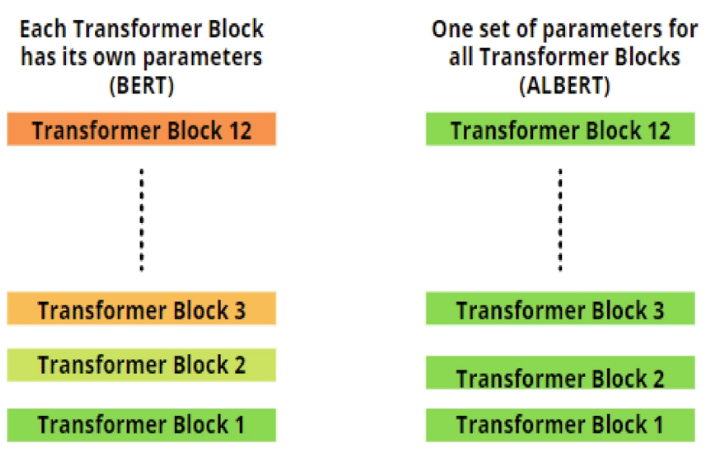

Now it all makes sense isn't it?

Let us see how parameter sharing is done.


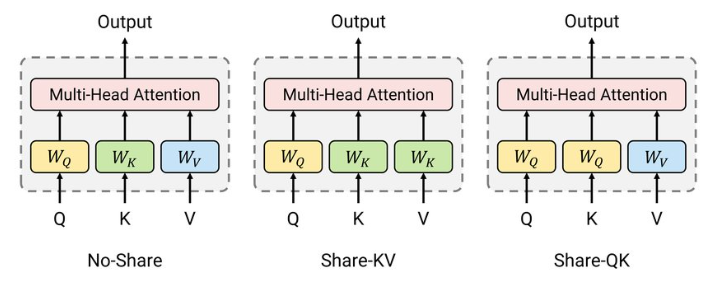

Parameters can be shared between the feed forward networks also depending on what parameters are being shared parameter sharing can be further categorised as
* All Shared
* Shared Attention
* Shared Feed Forward Network

Have you noticed anything familiar with the above diagram! 

If yes congratulations! you are on the right track.

Don't worry if you didn't 

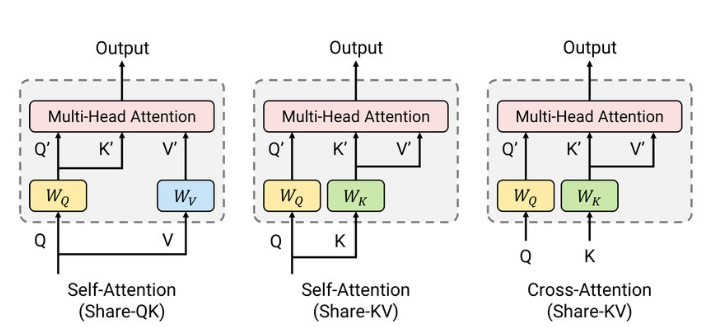

**Yes , parameter sharing is indeed inspired from Decoder of the Transformer model!**

## **Factorized embedding layer parameterization**

Let us denote the **vocablary size of our model as V**.

Let us denote the **Embedding dimensions of our model as H**.

For instance BERT has 30000 words in it's vocabulary and has an embedding dimension of 768 

The **dimensions of our hidden layer embeddings will be 30000 x 768**
 
isn't is huge ALBERT tackles that as well using Factored embedding layer pameterization.

Let's see hoe it is done

Factored embedding layer parameterization is a technique where we split the embedding matrix into multiple smaller embedding matrices thereby reducing the number of parameters to be learned.

**Remember Word peice Embedding of BERT is also learned during training**

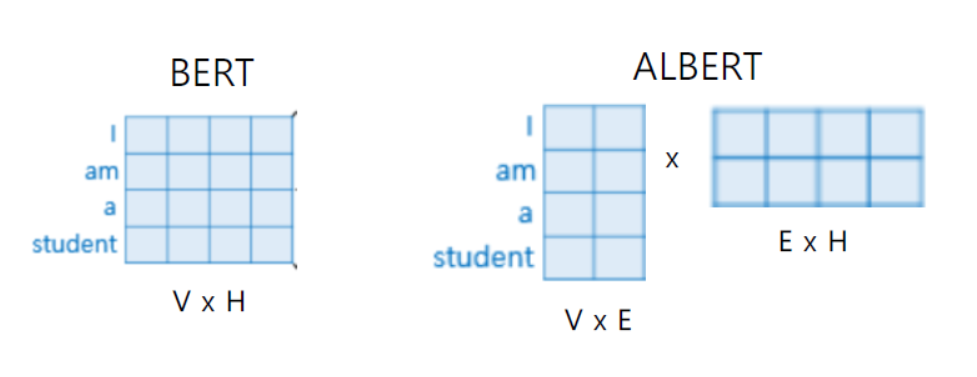

## ALBERT vs BERT

Let us find out how ALBERT differs from it's predecessor BERT

BERT is trained using MLM(Masked Language Modelling) and NSP(Next Sentence Prediction).

ALBERT is trained using MLM and SOP(Sentence Order Prediction)

Researchers of ALBERT has shown that NSP is not a difficult task compared to MLP and is insignificant so they used SOP insted of NSP

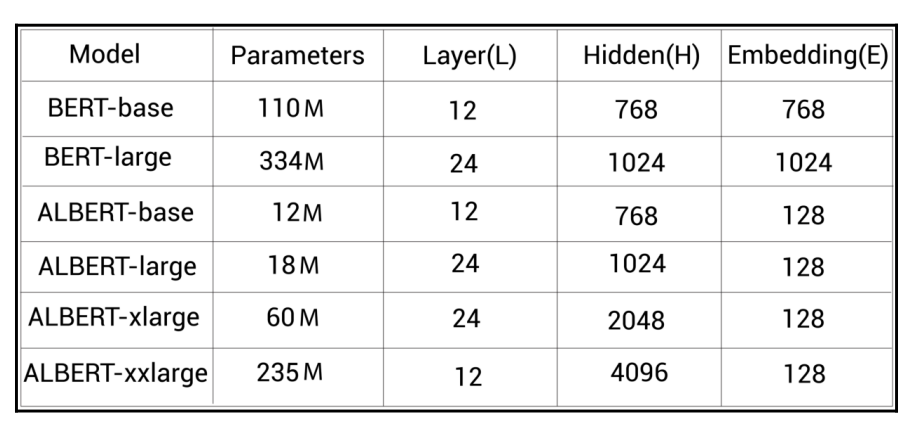

### **Instantiating ALBERT**

In [9]:
from transformers import AlbertTokenizer, AlbertModel

In [10]:
albert_tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")
albert_model = AlbertModel.from_pretrained("albert-base-v2")

Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.bias', 'predictions.LayerNorm.bias', 'predictions.decoder.weight', 'predictions.dense.bias', 'predictions.dense.weight', 'predictions.decoder.bias', 'predictions.LayerNorm.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Let us consider the same two sequence and see how ALBERT differentiates them

### **Getting Representations from ALBER**T

In [11]:
sentence1 = "I love Python"
sentence2 = "My friend got bitten by a Python"

In [12]:
seq1_albert,seq2_albert = get_input_embeddings(albert_tokenizer,sentence1,sentence2)
seq1_bert,seq2_bert     = get_input_embeddings(bert_tokenizer,sentence1,sentence2)

In [13]:
rep1_albert,rep2_albert = get_contextual_embeddings(albert_model,seq1_albert,seq2_albert)
rep1_bert , rep2_bert   = get_contextual_embeddings(bert_model,seq1_bert,seq2_bert)

BERT base embedding to compare

In [14]:
rep_python_seq1_bert = rep1_bert[0][-2]
rep_python_seq2_bert = rep2_bert[0][-2]
rep_python_seq1_bert = np.array(rep_python_seq1_bert.tolist())
rep_python_seq2_bert = np.array(rep_python_seq2_bert.tolist())

Corresponding ALBERT embeddings

In [15]:
rep_python_seq1_albert = rep1_albert[0][-2]
rep_python_seq2_albert = rep2_albert[0][-2]
rep_python_seq1_albert = np.array(rep_python_seq1_albert.tolist())
rep_python_seq2_albert = np.array(rep_python_seq2_albert.tolist())

**Comparision:**
* Contextual comparision between ALBERT embedding
* Comparision between BERT and ALBERT

In [16]:
rep_python_seq1_albert.shape

(768,)

In [17]:
rep_python_seq1_bert.shape

(768,)

### **Comapring the Performance**

**ALBERT X ALBERT Comparision with BERT X BERT**

In [18]:
print(cosine_similarity(rep_python_seq1_albert,rep_python_seq2_albert))

734.2822454528177
0.7789892401169427


In [19]:
print(cosine_similarity(rep_python_seq1_bert,rep_python_seq2_bert))

110.22401178822619
0.5143410846456383


ALBERT tries to differentiate the words but not as good as BERT 

For most of the tasks this differentiation is more than enough

**ALBERT X BERT Comparision**

In [20]:
print(cosine_similarity(rep_python_seq1_albert,rep_python_seq1_bert))

5.714189638653025
0.012875700921180327


In [21]:
print(cosine_similarity(rep_python_seq2_albert,rep_python_seq2_bert))

-11.400440190042612
-0.025046602519979574


Okay what are we trying to do over here? 

and 

What does these cosine similarity values close to zero indicates us?

Let us understand Cosine similarity a little better

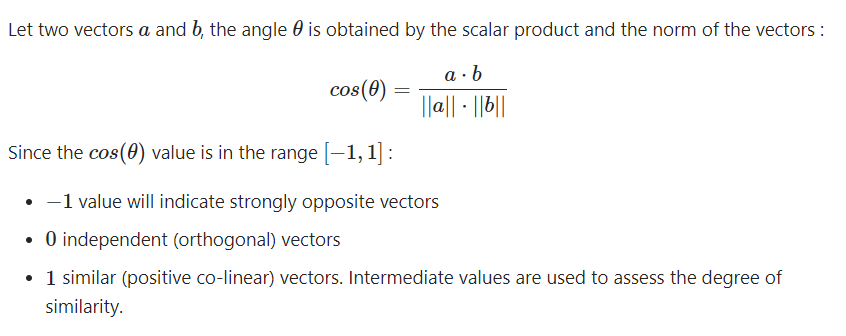

**Thus the Representations generated by BERT and ALBERT are independent of each other**

**This implies that BERT and ALBERT generates tolally different sets of contextual embeddings**

# **RoBERTa**

RoBERTa stands for Robustly Optimized BERT pre-training
Approach

Researchers observed that BERT is severely undertrained and proposed several approaches to pre-train the BERT model



## **What makes up RoBERTa?**

* Using Dynamic masking in MLM instead of static masking
* Remove NSP and use only MLM
* Train with a larger batch size
* Use BBPE (Byte level Byte Pair Encoding)



As name suggests dynamic masking is straight forward 
instead of masking the same word in a sequence randomly mask 15% of the tokens.

It is as simple as that but has a huge impact

and regarding NSP we have already seen it is not so useful

## **Training with a larger batch size**

BERT is pre-trained with a batch size of 256 sequences for 1 million steps.
We pre-train RoBERTa with a larger mini-batch size. 

We pre-train RoBERTa with a batch
size of 8,000 sequences for 300,000 steps. 

We can also pre-train longer with a batch size of
8,000 sequences for 500,000 steps

**Training with a larger batch size increases the speed and performance of
the model.**

## **Byte Level Byte Pair Encoding**

The steps involved in BPE are provided here: 
1. Extract the words from the given dataset along with their count.
1. Define the vocabulary size.
2. Split the words into a character sequence.
3. Add all the unique characters in our character sequence to the vocabulary. 
4. Select and merge the symbol pair that has a high frequency.
5. Repeat step-5 until the vocabulary size is reached.

Byte-level byte pair encoding (BBPE) works very
similar to BPE, but instead of using a character-level sequence, it uses a byte-level sequence.

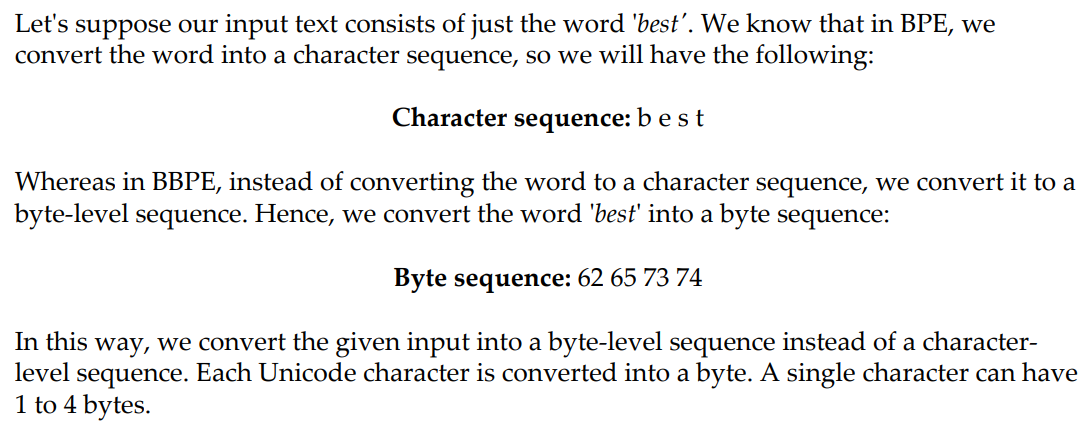

When it comes to Bytes we can't forget Java

Have you ever wondered why Java is platform independent?

It uses Byte code unlike other languages Byte code gives us the platform independence in terms of execution

But what exactly Byte level encoding gives us here?

**Byte level Encoding makes BERT multilingual** 

## **Instantiating RoBERTa**

In [22]:
from transformers import RobertaModel, RobertaTokenizer

In [23]:
roberta_model = RobertaModel.from_pretrained('roberta-base')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

## **Getting Embeddings from RoBERTa**

Again the same sentences as before!

and you know the drill

In [25]:
sentence1 = "I love Python"
sentence2 = "My friend got bitten by a Python"

In [26]:
seq1_roberta,seq2_roberta = get_input_embeddings(roberta_tokenizer,sentence1,sentence2)
rep1_roberta,rep2_roberta = get_contextual_embeddings(roberta_model,seq1_roberta,seq2_roberta)

In [27]:
rep_python_seq1_roberta = rep1_roberta[0][-2]
rep_python_seq2_roberta = rep2_roberta[0][-2]
rep_python_seq1_roberta = np.array(rep_python_seq1_roberta.tolist())
rep_python_seq2_roberta = np.array(rep_python_seq2_roberta.tolist())

In [28]:
rep_python_seq1_roberta.shape

(768,)

## **RoBERTa vs BERT base**

In [29]:
print(cosine_similarity(rep_python_seq1_roberta,rep_python_seq2_roberta))

149.6571244208863
0.9148261872403847


In [30]:
print(cosine_similarity(rep_python_seq1_roberta,rep_python_seq1_bert))

2.8933340286861746
0.01655856736356313


In [31]:
print(cosine_similarity(rep_python_seq2_albert,rep_python_seq2_bert))

-11.400440190042612
-0.025046602519979574


The results convey a similar thing like ALBERT

# **BONUS : Try out embedding with ELECTRA and SPANBERT similarly and paractice**